In [1]:
from sortedcontainers import SortedList
from math import ceil,floor
from numpy.random import uniform,poisson,seed,normal
from collections import deque

In [2]:
def push(G,P,x,y) :
    for xi,yi in P :
        try :
            G.add((y-yi)/(x-xi))
        except :
            pass
    P.append((x,y))
    return (G,P)

def pop(G,P) :
    x,y = P.pop(0)
    for xi,yi in P :
        try :
            G.remove((y-yi)/(x-xi))
        except :
            pass    
    return (G,P)
        
class seq_theil_sen :
    def __init__(self) :
        self.P = list()
        self.G = SortedList()
        self.gradient = None
    def pop(self) :
        self.G,self.P = pop(self.G,self.P)
        if len(self.G) > 0 :
            self.gradient = (self.G[ceil(len(self.G)/2) - 1] + self.G[floor(len(self.G)/2)])/2
        return self
    def push(self,x,y) :
        self.G,self.P = push(self.G,self.P,x,y)
        if len(self.G) > 0 :
            self.gradient = (self.G[ceil(len(self.G)/2) - 1] + self.G[floor(len(self.G)/2)])/2
        return self

In [3]:
X = [i for i in range(1000)]
Y = [i*0.1 + normal(0,1) for i in range(1000)]

In [4]:
S = seq_theil_sen()
for x,y in zip(X,Y) :
    S.push(x,y)

In [5]:
S.gradient

0.099983890560605

In [6]:
x = [1,2,3,4]

In [7]:
x.pop(0)

1

In [8]:
x

[2, 3, 4]

In [9]:
x.append(5)

In [10]:
!python -m pip install pandas


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


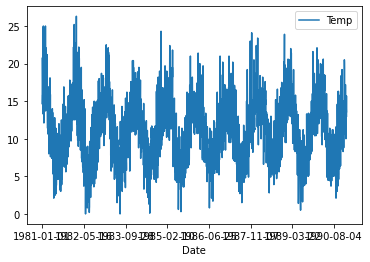

In [11]:
from os import chdir
from pandas import read_csv
from matplotlib import pyplot
"x"
series = read_csv("blob.csv", header=0, index_col=0)
series.plot()
pyplot.show()

In [12]:
Temp = list(series.loc[:,"Temp"])

In [13]:
!python -m pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [14]:
from statsmodels.tsa.stattools import acf

In [15]:
acf(Temp,nlags=1)

array([1.      , 0.774268])

In [16]:
S = seq_theil_sen()
for x,y in zip(Temp[1:],Temp[:-1]) :
    S.push(x,y)
for i in range(1000) :
    S.pop()

In [17]:
len(S.G)

3481674

In [18]:
S.gradient

0.7757009345794392

In [19]:
Z = Temp[1000:]
len(Z)

2650

In [20]:
S = seq_theil_sen()
for x,y in zip(Z[1:],Z[:-1]) :
    S.push(x,y)

In [21]:
S.gradient

0.7757009345794392

In [22]:
S = seq_theil_sen()
wsize = 1000
for x,y in zip(Temp[1:],Temp[:-1]) :
    if len(S.P) == wsize :
        S.pop()
    S.push(x,y)

In [23]:
theilslopes(Z[1:],Z[:-1])

NameError: name 'theilslopes' is not defined

In [30]:
import matplotlib.pyplot as plt

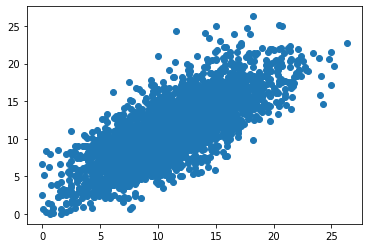

In [31]:
plt.plot(Temp[1:],Temp[:-1],'o')

In [ ]:
from scipy.stats import linregress

In [ ]:
linregress(Temp[1:],Temp[:-1])fo

In [ ]:
linregress(Temp[:-1],Temp[1:])

In [ ]:
from scipy.stats.mstats import theilslopes

In [ ]:
theilslopes(Temp[:-1],Temp[1:])

In [ ]:
theilslopes(Temp[1:],Temp[:-1])

In [25]:
import time

In [ ]:
tic = time.perf_counter()
Z = Temp[:1000]
for i in range(3650) :
    theilslopes(Z[1:],Z[:-1])
toc = time.perf_counter()
toc - tic

In [26]:
S = seq_theil_sen()
res = list()
wsize = 1000
tic = time.perf_counter()
for x,y in zip(Temp[1:],Temp[:-1]) :
    if len(S.P) == wsize :
        S.pop()
    S.push(x,y)
    res.append(S.gradient)
toc = time.perf_counter()
toc - tic

15.220901366032194

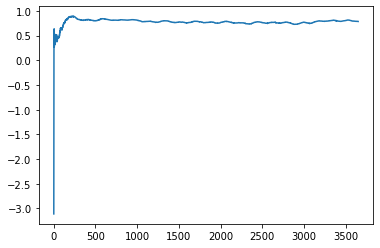

In [32]:
plt.plot(res)

In [94]:
import pandas
chdir("/home/grosedj/work/seqstats-env/notebooks")
machinetemp = read_csv("machinetemp.csv",header=0).temp.tolist()

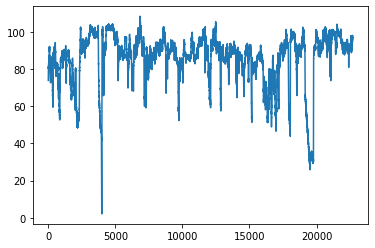

In [96]:
plt.plot(machinetemp)

In [125]:
S = seq_theil_sen()
res = list()
wsize = 1000
tic = time.perf_counter()
for x,y in zip(machinetemp[1:],machinetemp[:-1]) :
    if len(S.P) == wsize :
        S.pop()
    S.push(x,y)
    res.append(S.gradient)
toc = time.perf_counter()
toc - tic

115.76895093900384

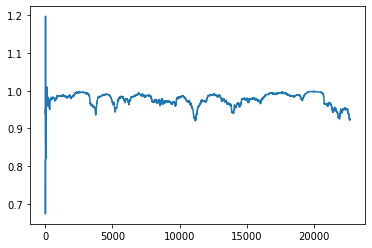

In [126]:
plt.plot(res)

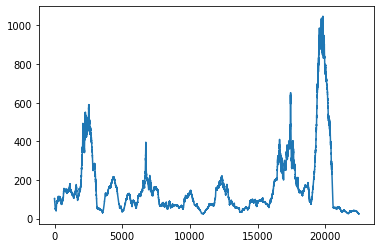

In [127]:
plt.plot([(1+r)/(1-r) for r in res[200:] if r != None and r < 1])